#**SOAL 1**

# Import library

In [147]:
import numpy as np  # Buat bikin array, hitung rata-rata, bandingin nilai, dll. Kayak Excel tapi lebih cepat.
import matplotlib.pyplot as plt  # Buat gambar grafik, citra, plot. Kayak Canva buat data.
from tensorflow.keras.datasets import mnist  # Dataset MNIST langsung dari Keras. Gak perlu download manual.
from tensorflow.keras.utils import to_categorical  # Ubah angka 3 jadi [0,0,0,1,0,0,0,0,0,0] — buat model ngerti probabilitas.
from tensorflow.keras.models import Sequential  # Model yang lapisannya ditumpuk dari atas ke bawah, kayak roti lapis.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Alat-alat buat bikin CNN.
from tensorflow.keras.optimizers import Adam  # Adam itu "otak" yang ngatur langkah belajar model biar cepat & stabil.
import os  # Buat buka folder, baca file, kayak File Explorer di Python.

# Memuat dataset MNIST

In [148]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Ambil data MNIST: 60.000 latih + 10.000 uji
# x_train = gambar buat belajar (60.000)
# y_train = jawaban buat gambar itu (angka 0-9)
# x_test = gambar buat ujian (10.000)
# y_test = jawaban ujian
print("Jumlah data latih:", x_train.shape[0])  # Harus 60000 — cek jumlah data latih
print("Jumlah data uji:", x_test.shape[0])    # Harus 10000 — cek jumlah data uji
print("Dimensi tiap citra (tinggi, lebar):", x_train.shape[1:])  # (28, 28) — ukuran gambar
print("Tipe data awal citra:", x_train.dtype)  # uint8 → angka 0 sampai 255 (hitam-putih)

Jumlah data latih: 60000
Jumlah data uji: 10000
Dimensi tiap citra (tinggi, lebar): (28, 28)
Tipe data awal citra: uint8


# Visualisasi Citra Sebelum Diolah

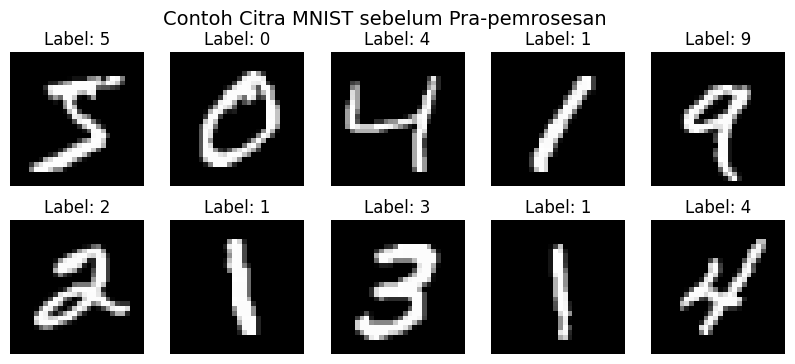

In [149]:
plt.figure(figsize=(10, 4))  # Buat kanvas: lebar 10 inci, tinggi 4 inci
for i in range(10):  # Ambil 10 gambar pertama dari data latih
    plt.subplot(2, 5, i + 1)  # Bagi jadi 2 baris, 5 kolom → total 10 slot
    plt.imshow(x_train[i], cmap='gray')  # Tampilkan gambar dalam warna abu-abu
    plt.title(f"Label: {y_train[i]}")  # Tulis angka aslinya di atas gambar
    plt.axis('off')  # Sembunyiin garis sumbu biar rapi
plt.suptitle('Contoh Citra MNIST sebelum Pra-pemrosesan', fontsize=14)  # Judul besar di atas
plt.show()  # Munculin gambarnya di layar

# Pra Pemrosesan Data

In [150]:
x_train = x_train.astype('float32') / 255.0  # Ubah tipe jadi float dan bagi 255 → nilai jadi 0 sampai 1
x_test = x_test.astype('float32') / 255.0   # Sama buat data uji — normalisasi penting!
x_train = np.expand_dims(x_train, axis=-1)  # Tambah channel: dari (28,28) jadi (28,28,1)
x_test = np.expand_dims(x_test, axis=-1)    # Sama buat data uji — CNN butuh channel
y_train = to_categorical(y_train, num_classes=10)  # Ubah label 3 jadi [0,0,0,1,0,0,0,0,0,0]
y_test = to_categorical(y_test, num_classes=10)    # Sama buat data uji — one-hot encoding
print("Bentuk x_train setelah pra-pemrosesan:", x_train.shape)  # Harus (60000, 28, 28, 1)
print("Bentuk x_test setelah pra-pemrosesan:", x_test.shape)    # Harus (10000, 28, 28, 1)
print("Bentuk y_train (one-hot):", y_train.shape)               # Harus (60000, 10)

Bentuk x_train setelah pra-pemrosesan: (60000, 28, 28, 1)
Bentuk x_test setelah pra-pemrosesan: (10000, 28, 28, 1)
Bentuk y_train (one-hot): (60000, 10)


# Visualisasi Citra Setelah Pra-pemrosesan

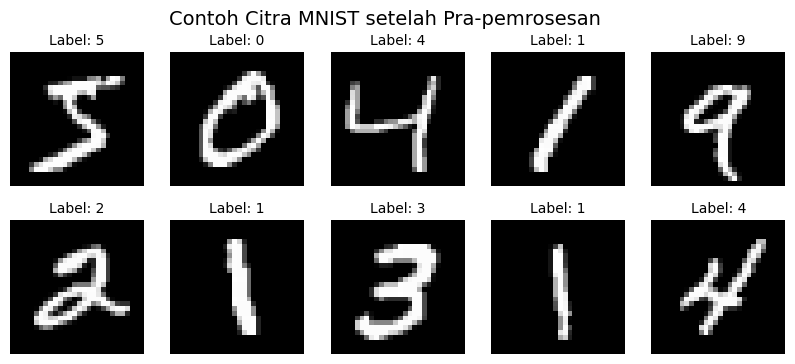

In [151]:
plt.figure(figsize=(10, 4))  # ukuran kanvas figure

for i in range(10):  # tampilkan 10 contoh citra pertama
    plt.subplot(2, 5, i + 1)  # susun 2 baris x 5 kolom
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # tampilkan citra
    plt.title(f"Label: {np.argmax(y_train[i])}", fontsize=10)  # label kecil di atas tiap gambar
    plt.axis('off')  # hilangkan sumbu

plt.suptitle('Contoh Citra MNIST setelah Pra-pemrosesan', fontsize=14)
plt.show()  # tampilkan plot

#**SOAL 2**

# Buat Model CNN dari Nol (Model A)

In [152]:
modelA = Sequential()  # Mulai bikin model kosong
modelA.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))  # Lihat pola kecil: tepi, sudut
modelA.add(MaxPooling2D(pool_size=(2,2)))  # Kecilkan gambar: 28 → 14
modelA.add(Conv2D(64, kernel_size=(3,3), activation='relu'))  # Lihat pola lebih kompleks
modelA.add(MaxPooling2D(pool_size=(2,2)))  # Kecilkan lagi: 14 → 7
modelA.add(Flatten())  # Ubah gambar 3D jadi vektor 1D
modelA.add(Dense(128, activation='relu'))  # Gabungin semua info
modelA.add(Dropout(0.3))  # Matikan 30% neuron acak biar gak overfit
modelA.add(Dense(10, activation='softmax'))  # Output: 10 kemungkinan angka
modelA.summary()  # Tampilkan arsitektur model — penting buat laporan

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Kompile Model

In [153]:
modelA.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # Atur cara belajar

# Latih Model

In [154]:
historyA = modelA.fit(  # Mulai latih
    x_train, y_train,   # Data latih
    epochs=10,          # 10 putaran penuh
    batch_size=128,     # Tiap putaran lihat 128 gambar
    validation_data=(x_test, y_test),  # Cek performa di data ujian
    verbose=1           # Tampilkan progress
)
print("\nPelatihan selesai.")  # Beri tahu kalau selesai

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8357 - loss: 0.5335 - val_accuracy: 0.9825 - val_loss: 0.0522
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9782 - loss: 0.0724 - val_accuracy: 0.9866 - val_loss: 0.0389
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9841 - loss: 0.0496 - val_accuracy: 0.9901 - val_loss: 0.0313
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accuracy: 0.9902 - val_loss: 0.0284
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9916 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9915 - loss: 0.0285 - val_accuracy: 0.9918 - val_loss: 0.0260
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9916 - val_loss: 0.0246
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0

# Plot Hasil Training

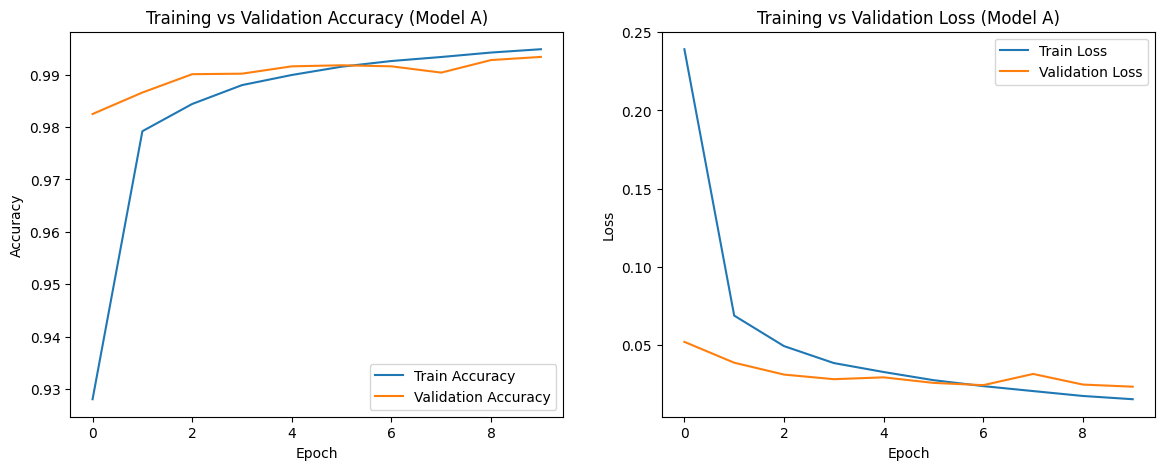

In [155]:
plt.figure(figsize=(14,5))  # Buat dua grafik berdampingan

# Subplot akurasi
plt.subplot(1,2,1)  # Grafik kiri: akurasi
plt.plot(historyA.history['accuracy'], label='Train Accuracy')  # Akurasi latih
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')  # Akurasi uji
plt.title('Training vs Validation Accuracy (Model A)')  # Judul
plt.xlabel('Epoch')  # Sumbu X
plt.ylabel('Accuracy')  # Sumbu Y
plt.legend()  # Legenda

# Subplot loss
plt.subplot(1,2,2)  # Grafik kanan: loss
plt.plot(historyA.history['loss'], label='Train Loss')  # Loss latih
plt.plot(historyA.history['val_loss'], label='Validation Loss')  # Loss uji
plt.title('Training vs Validation Loss (Model A)')  # Judul
plt.xlabel('Epoch')  # Sumbu X
plt.ylabel('Loss')  # Sumbu Y
plt.legend()  # Legenda
plt.show()  # Tampilkan grafik

# Simpan Model

In [156]:
modelA.save('modelA_mnist.h5')  # Simpan biar bisa dipake lagi
print('Model A berhasil disimpan sebagai modelA_mnist.h5')  # Konfirmasi

Model A berhasil disimpan sebagai modelA_mnist.h5


# Uji Data Uji

In [157]:
loss, acc = modelA.evaluate(x_test, y_test, verbose=0)  # Hitung loss dan akurasi
print(f"Evaluasi singkat pada data uji -> Loss: {loss:.4f}, Accuracy: {acc:.4f}")  # Tampilkan hasil

Evaluasi singkat pada data uji -> Loss: 0.0236, Accuracy: 0.9934


#**SOAL 3**

# UJI MODEL A PAKE TULISAN TANGAN SENDIRI (NIM: 202332082)

# Import Library

In [158]:
# Angka terakhir NIM: 0, 8, 2
# Artinya kita akan uji model CNN terhadap 30 citra tulisan tangan
# (10 gambar angka '0', 10 gambar angka '8', dan 10 gambar angka '2')

import numpy as np  # Butuh lagi buat array
import matplotlib.pyplot as plt  # Buat gambar
import cv2  # Baca dan olah foto
import os  # Buka folder
from tensorflow.keras.models import load_model  # Muat model

# Load model CNN yang sudah dilatih (Model A)

In [159]:
model = load_model('modelA_mnist.h5')  # Muat model yang tadi disimpan

# Tentukan lokasi folder tempat menyimpan gambar tulisan tangan

In [160]:
folder_path = '/content/tulisan-alpi/'  # Folder tempat simpan 30 foto tulisan tangan

# Fungsi untuk pra-pemrosesan setiap citra tulisan tangan

In [161]:
def preprocess_image(img_path):  # Fungsi buat olah foto
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca sebagai hitam-putih
    img = cv2.resize(img, (28, 28))  # Ubah jadi 28x28
    img = cv2.bitwise_not(img)  # Balik warna: hitam → putih (sesuai MNIST)
    img = img / 255.0  # Normalisasi
    img = img.reshape(1, 28, 28, 1)  # Tambah dimensi batch dan channel
    return img  # Kembalikan gambar yang siap diprediksi

# Visualisasi beberapa contoh hasil pra-pemrosesan

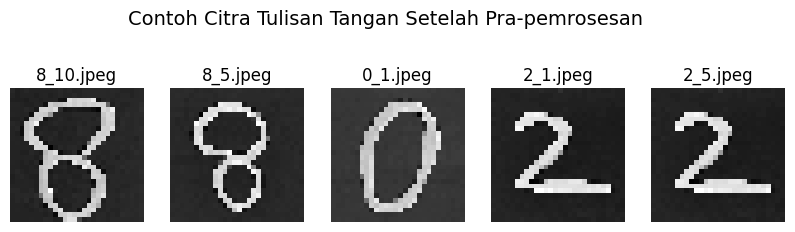

In [162]:
sample_images = os.listdir(folder_path)[:5]  # Ambil 5 gambar pertama
plt.figure(figsize=(10, 3))  # Buat kanvas
for i, img_name in enumerate(sample_images):  # Loop 5 gambar
    img_path = os.path.join(folder_path, img_name)  # Gabung path
    processed_img = preprocess_image(img_path)  # Olah gambar
    plt.subplot(1, 5, i + 1)  # Susun 1 baris, 5 kolom
    plt.imshow(processed_img.reshape(28, 28), cmap='gray')  # Tampilkan
    plt.title(img_name)  # Nama file
    plt.axis('off')  # Sembunyiin sumbu
plt.suptitle('Contoh Citra Tulisan Tangan Setelah Pra-pemrosesan', fontsize=14)  # Judul
plt.show()  # Tampilkan

# Prediksi seluruh citra tulisan tangan dan hitung akurasi

In [163]:
true_labels = []  # Simpan label asli (0, 8, 2)
predicted_labels = []  # Simpan hasil prediksi
for img_name in os.listdir(folder_path):  # Loop semua file
    if img_name.lower().endswith(('.jpeg', '.jpg', '.png')):  # Cuma ambil gambar
        true_label = int(img_name.split('_')[0])  # Ambil angka dari nama file
        img_path = os.path.join(folder_path, img_name)  # Path lengkap
        img = preprocess_image(img_path)  # Olah gambar
        pred = model.predict(img)  # Prediksi
        predicted_label = np.argmax(pred)  # Ambil angka dengan nilai tertinggi
        true_labels.append(true_label)  # Simpan asli
        predicted_labels.append(predicted_label)  # Simpan prediksi
        print(f"Citra {img_name}: Label Asli = {true_label}, Prediksi = {predicted_label}")  # Tampilkan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Citra 8_10.jpeg: Label Asli = 8, Prediksi = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Citra 8_5.jpeg: Label Asli = 8, Prediksi = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Citra 0_1.jpeg: Label Asli = 0, Prediksi = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Citra 2_1.jpeg: Label Asli = 2, Prediksi = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Citra 2_5.jpeg: Label Asli = 2, Prediksi = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Citra 0_3.jpeg: Label Asli = 0, Prediksi = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Citra 8_7.jpeg: Label Asli = 8, Prediksi = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Citra 2_9.jpeg: Label Asli = 2, Prediksi = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Citra 8_3.jpeg: Label Asli = 8, Prediksi = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Citra 0_9.jpeg: Label Asli = 0, Prediksi = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Citra 2_3.jpeg: Label Asli = 2, Prediksi = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Citra 8_9.jpeg: Label Asli = 8, Prediksi = 8
1/

# Hitung akurasi prediksi Model A terhadap tulisan tanganmu

In [164]:
true_labels = np.array(true_labels)  # Ubah jadi array
predicted_labels = np.array(predicted_labels)  # Ubah jadi array
accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)  # Hitung akurasi
print(f"\nAkurasi Model A terhadap tulisan tangan (angka 0,8,2): {accuracy * 100:.2f}%")  # Tampilkan


Akurasi Model A terhadap tulisan tangan (angka 0,8,2): 90.00%


# Visualisasi hasil prediksi untuk 10 gambar pertama

Jumlah citra terbaca: 9
Jumlah label asli: 30
Jumlah hasil prediksi: 30


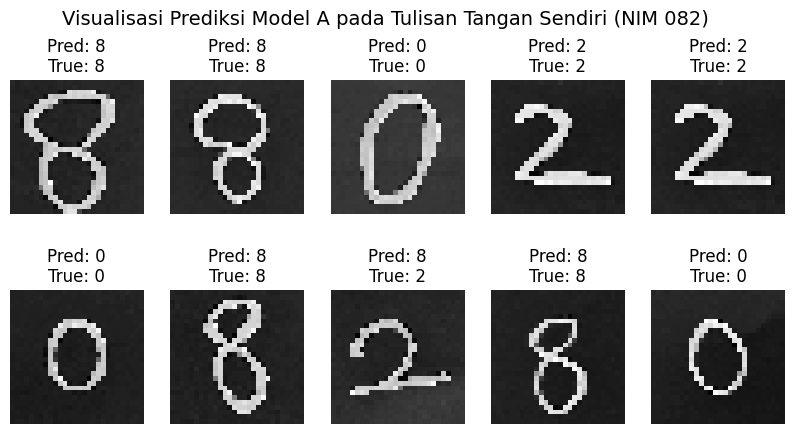

In [165]:
print("Jumlah citra terbaca:", len(img_name))  # Cek jumlah file (debug)
print("Jumlah label asli:", len(true_labels))  # Cek jumlah label
print("Jumlah hasil prediksi:", len(predicted_labels))  # Cek jumlah prediksi

plt.figure(figsize=(10, 5))  # Buat kanvas
for i in range(10):  # Tampilkan 10 gambar pertama
    img_path = os.path.join(folder_path, os.listdir(folder_path)[i])  # Ambil path
    img = preprocess_image(img_path)  # Olah
    plt.subplot(2, 5, i + 1)  # Grid 2x5
    plt.imshow(img.reshape(28, 28), cmap='gray')  # Tampilkan
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")  # Prediksi & asli
    plt.axis('off')  # Sembunyiin sumbu
plt.suptitle('Visualisasi Prediksi Model A pada Tulisan Tangan Sendiri (NIM 082)', fontsize=14)  # Judul
plt.show()  # Tampilkan

#**SOAL 4**

# TRANSFER LEARNING DENGAN VGG16 (MODEL B)

# Import library

In [166]:
import tensorflow as tf  # TensorFlow utama
from tensorflow.keras.applications import VGG16  # Muat VGG16
from tensorflow.keras.models import Sequential  # Model berurutan
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Lapisan tambahan
from tensorflow.keras.optimizers import Adam  # Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # (Tidak dipakai, tapi aman)
import matplotlib.pyplot as plt  # Plot

# Siapkan data MNIST untuk menyesuaikan input VGG16

In [167]:
# VGG16 butuh input 3 channel (RGB) dengan ukuran minimal 32x32 atau 48x48
# Jadi, kita ubah data MNIST (28x28 grayscale) menjadi (48x48x3)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Ambil MNIST lagi

x_train = x_train.astype('float32') / 255.0  # Normalisasi
x_test = x_test.astype('float32') / 255.0   # Normalisasi

x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))  # Ubah ke RGB
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))  # Ubah ke RGB

x_train = tf.image.resize(x_train, [48, 48])  # Ubah ukuran jadi 48x48
x_test = tf.image.resize(x_test, [48, 48])  # Ubah ukuran jadi 48x48

# Inisialisasi model dasar VGG16 (tanpa top / classifier bawaan)

In [168]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))  # Muat VGG16 tanpa kepala

# Bekukan semua layer VGG16 agar tidak ikut dilatih ulang
for layer in base_model.layers:  # Loop semua lapisan
    layer.trainable = False  # Bekukan — jangan latih ulang

# Bangun Model B dengan lapisan tambahan di atas VGG16

In [169]:
model_b = Sequential([          # Bikin model baru
    base_model,                  # model dasar VGG16
    Flatten(),                   # ubah fitur 3D jadi 1D (Ratakan fitur)
    Dense(256, activation='relu'), # lapisan fully connected pertama (Lapisan 256 neuron)
    Dropout(0.5),                # cegah overfitting
    Dense(128, activation='relu'), # lapisan fully connected kedua(Lapisan 128 neuron)
    Dense(10, activation='softmax') # lapisan output 10 kelas (digit 0–9)
])

# Kompilasi Model B

In [170]:
model_b.compile(  # Atur cara belajar
    optimizer=Adam(learning_rate=0.0001),  # Learning rate kecil
    loss='sparse_categorical_crossentropy',  # Label integer
    metrics=['accuracy']  # Pantau akurasi
)

# Latih Model B

In [171]:
history_b = model_b.fit(  # Latih model
    x_train, y_train,  # Data latih
    epochs=5,  # 5 epoch
    batch_size=64,  # Batch 64
    validation_data=(x_test, y_test)  # Validasi
)
print("\nPelatihan selesai.")  # Selesai

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.4639 - loss: 1.6095 - val_accuracy: 0.8836 - val_loss: 0.4229
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8597 - loss: 0.4663 - val_accuracy: 0.9270 - val_loss: 0.2485
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9079 - loss: 0.3079 - val_accuracy: 0.9427 - val_loss: 0.1886
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9281 - loss: 0.2373 - val_accuracy: 0.9544 - val_loss: 0.1538
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9403 - loss: 0.1978 - val_accuracy: 0.9589 - val_loss: 0.1317

Pelatihan selesai.


# Plot akurasi dan loss selama training

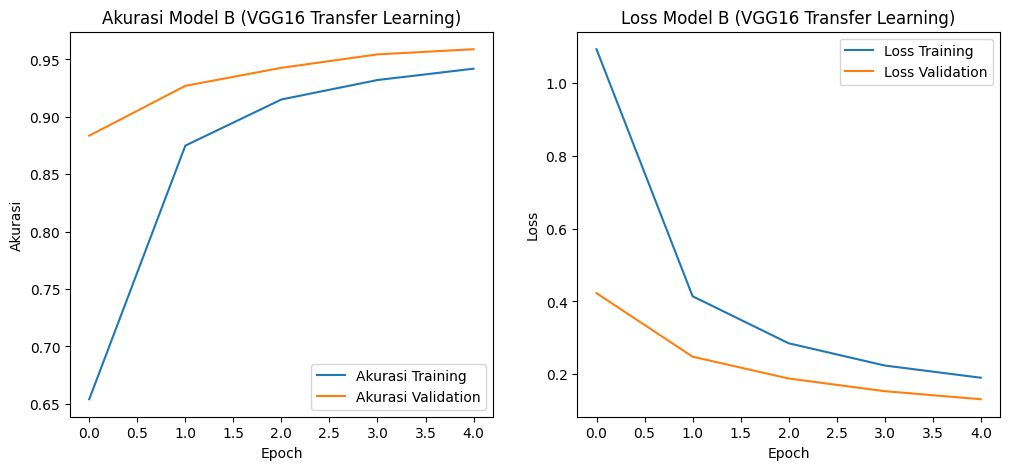

In [172]:
plt.figure(figsize=(12, 5))  # Buat grafik

# Subplot akurasi
plt.subplot(1, 2, 1)  # Grafik kiri
plt.plot(history_b.history['accuracy'], label='Akurasi Training')  # Akurasi latih
plt.plot(history_b.history['val_accuracy'], label='Akurasi Validation')  # Akurasi uji
plt.title('Akurasi Model B (VGG16 Transfer Learning)')  # Judul
plt.xlabel('Epoch')  # Sumbu X
plt.ylabel('Akurasi')  # Sumbu Y
plt.legend()  # Legenda

# Subplot loss
plt.subplot(1, 2, 2)  # Grafik kanan
plt.plot(history_b.history['loss'], label='Loss Training')  # Loss latih
plt.plot(history_b.history['val_loss'], label='Loss Validation')  # Loss uji
plt.title('Loss Model B (VGG16 Transfer Learning)')  # Judul
plt.xlabel('Epoch')  # Sumbu X
plt.ylabel('Loss')  # Sumbu Y
plt.legend()  # Legenda
plt.show()  # Tampilkan

# Simpan model

In [173]:
model_b.save('model_vgg16_mnist.h5')  # Simpan model

#**SOAL 5**

# Evaluasi Model B (VGG16 Transfer Learning) di tulisan tangan

# Import library

In [174]:
import numpy as np  # Array
from tensorflow.keras.models import load_model  # Muat model
from tensorflow.keras.preprocessing import image  # Baca gambar
import matplotlib.pyplot as plt  # Plot
import os  # Folder

# Load model B

In [175]:
model_b = load_model('model_vgg16_mnist.h5')  # Muat model

# Evaluasi model pada data uji MNIST

In [176]:
test_loss, test_acc = model_b.evaluate(x_test, y_test, verbose=1)  # Uji di MNIST
print(f"Evaluasi Model B pada data uji -> Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")  # Tampilkan

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9554 - loss: 0.1440
Evaluasi Model B pada data uji -> Loss: 0.1317, Accuracy: 0.9589


# Fungsi pra-pemrosesan untuk citra tulisan tangan sendiri

In [177]:
def preprocess_image_vgg(img_path):       # Fungsi olah buat VGG16
      # Fungsi ini membaca gambar tulisan tangan dan memprosesnya
      # agar cocok untuk model VGG16:
      # - ubah ke grayscale
      # - resize ke 48x48
      # - ubah ke 3 channel (RGB)
      # - normalisasi (0–1)
      # - ubah dimensi agar bisa diprediksi model

    # load citra dalam mode grayscale dan ubah ukurannya
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Baca 48x48, hitam-putih
    img_array = image.img_to_array(img)  # Ubah jadi array

    # ubah grayscale ke RGB dengan menggandakan channel 3 kali
    img_rgb = np.repeat(img_array, 3, axis=2)  # Duplikat channel ke RGB

    # normalisasi nilai piksel
    img_rgb = img_rgb / 255.0  # Normalisasi

    # ubah bentuk (1, 48, 48, 3)
    img_rgb = np.expand_dims(img_rgb, axis=0)  # Tambah batch
    return img_rgb  # Kembalikan

# Path folder tempat gambar tulisan tangan disimpan

In [178]:
folder_path = '/content/tulisan-alpi'  # Folder

# Ambil semua nama file gambar dalam folder

In [179]:
img_names = os.listdir(folder_path)  # Ambil semua nama file
img_names.sort()  # Urutkan biar rapi

# Loop untuk memproses setiap gambar dan memprediksi hasilnya

In [180]:
predicted_labels_b = []  # tempat hasil prediksi model
true_labels_b = []       # label asli (berdasarkan nama file)

for file_name in img_names:  # Loop semua file
    img_path = os.path.join(folder_path, file_name)  # Path lengkap

    # pra-pemrosesan
    img_preprocessed = preprocess_image_vgg(img_path)  # Olah

    # prediksi hasilnya (0–9)
    pred = np.argmax(model_b.predict(img_preprocessed), axis=1)[0]  # Prediksi
    predicted_labels_b.append(pred)  # Simpan

    # ambil label asli dari nama file, misal "8_01.jpg" → 8
    true_label = int(file_name.split('_')[0])  # Ambil label dari nama
    true_labels_b.append(true_label)  # Simpan

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

# Hitung akurasi model B terhadap tulisan tangan sendiri

In [181]:
predicted_labels_b = np.array(predicted_labels_b)  # Ubah jadi array
true_labels_b = np.array(true_labels_b)  # Ubah jadi array

accuracy_b = np.mean(predicted_labels_b == true_labels_b)  # Hitung akurasi
print(f"\nAkurasi Model B terhadap tulisan tangan sendiri: {accuracy_b*100:.2f}%")  # Tampilkan


Akurasi Model B terhadap tulisan tangan sendiri: 60.00%


# Visualisasi beberapa hasil prediksi

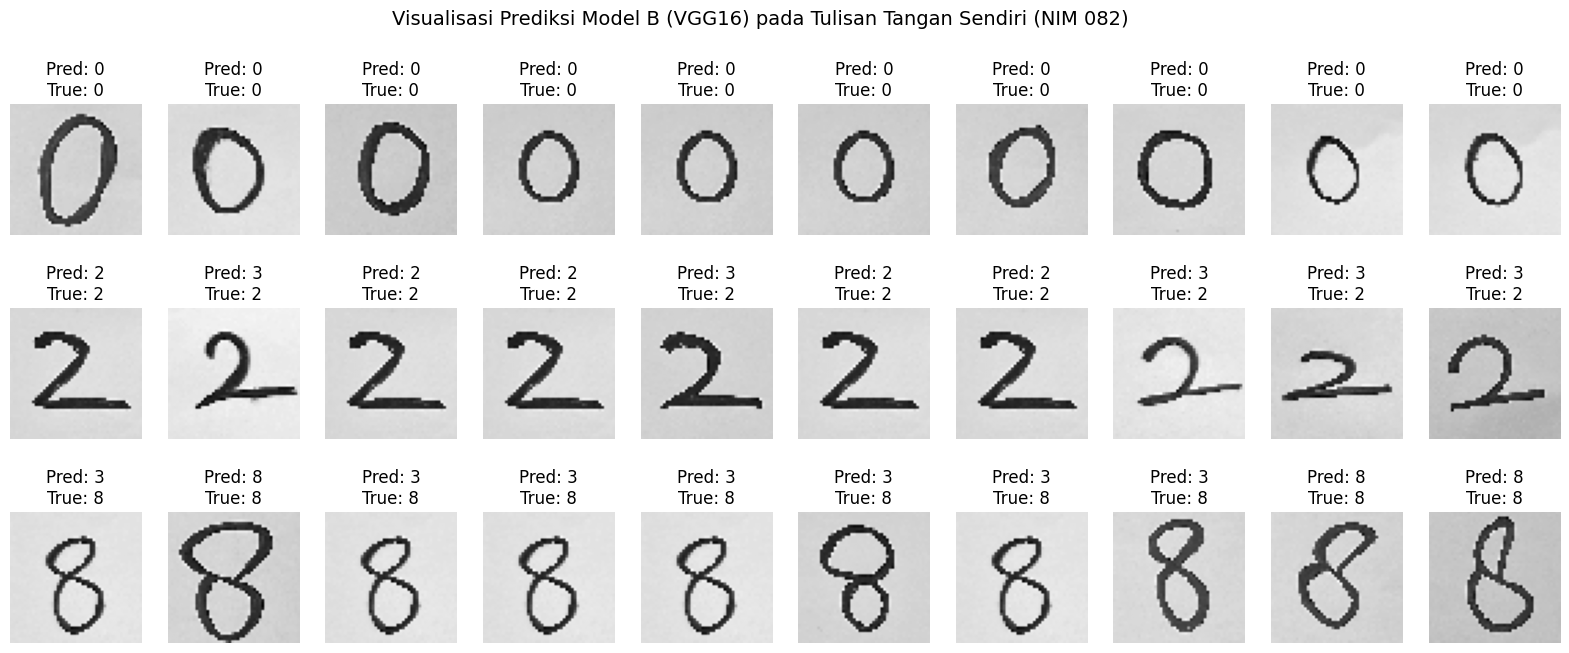

In [182]:
import math  # Buat hitung baris
n_images = len(img_names)  # Jumlah gambar
cols = 10  # 5 kolom
rows = math.ceil(n_images / cols)  # Hitung baris

plt.figure(figsize=(cols * 2, rows * 2.5))  # Ukuran kanvas

for i, file_name in enumerate(img_names):  # Loop semua
    img_path = os.path.join(folder_path, file_name)  # Path
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Baca
    img_array = image.img_to_array(img) / 255.0  # Normalisasi
    plt.subplot(rows, cols, i + 1)  # Grid
    plt.imshow(img_array.reshape(48, 48), cmap='gray')  # Tampilkan
    plt.title(f"Pred: {predicted_labels_b[i]}\nTrue: {true_labels_b[i]}")  # Label
    plt.axis('off')  # Sembunyiin sumbu

plt.suptitle('Visualisasi Prediksi Model B (VGG16) pada Tulisan Tangan Sendiri (NIM 082)', fontsize=14)  # Judul
plt.show()  # Tampilkan

#**SOAL 6**

# ANALISIS PERBANDINGAN

# Import library

In [183]:
import numpy as np                    # manipulasi array
import pandas as pd                    # tabel ringkasan
import matplotlib.pyplot as plt       # plotting
import os                             # Folder
from datetime import datetime         # Waktu (tidak dipakai)

# coba import metrik dari sklearn, jika tidak tersedia, skip kalkulasi lanjutan
try:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    SKLEARN_AVAILABLE = True  # Berhasil
except Exception:       # Gagal
    SKLEARN_AVAILABLE = False     # Tidak ada

# Ambil atau Tentukan Data

In [189]:
# Kita cek apakah variabel hasil prediksi ada di lingkungan (notebook)
# Potongan nama variabel yang mungkin kamu punya:
# - true_labels  (ground-truth untuk semua gambar)
# - predicted_labels (hasil Model A)
# - predicted_labels_b (hasil Model B)

# Jika tidak ada, kita fallback ke angka akurasi yang kamu sebut: 93.33% (A) dan 56.67% (B)

# default fallback akurasi (persentase)
fallback_acc_a = 90.0  # Akurasi default Model A
fallback_acc_b = 60.0  # Akurasi default Model B

# flags untuk apakah kita punya detail prediksi
have_details_a = False  # Belum tahu ada detail
have_details_b = False  # Belum tahu ada detail

# attempt to fetch variables from notebook globals
globals_dict = globals()  # Ambil semua variabel

# Model A details
if 'true_labels' in globals_dict and 'predicted_labels' in globals_dict:  # Cek Model A
    y_true_a = np.array(globals_dict['true_labels'])  # Label asli
    y_pred_a = np.array(globals_dict['predicted_labels'])  # Prediksi
    if y_true_a.size == y_pred_a.size and y_true_a.size > 0:  # Valid
        have_details_a = True  # Ada detail

# Model B details
if 'true_labels_b' in globals_dict and 'predicted_labels_b' in globals_dict:  # Cek Model B
    y_true_b = np.array(globals_dict['true_labels_b'])  # Label asli
    y_pred_b = np.array(globals_dict['predicted_labels_b'])  # Prediksi
    if y_true_b.size == y_pred_b.size and y_true_b.size > 0:  # Valid
        have_details_b = True  # Ada detail

# If Model B used same true_labels (likely), allow that
if not have_details_b and 'predicted_labels_b' in globals_dict and 'true_labels' in globals_dict:  # Alternatif
    y_true_b = np.array(globals_dict['true_labels'])  # Pakai true_labels
    y_pred_b = np.array(globals_dict['predicted_labels_b'])  # Prediksi B
    if y_true_b.size == y_pred_b.size and y_true_b.size > 0:  # Valid
        have_details_b = True  # Ada detail

# Hitung Metrik

In [190]:
summary = []  # List buat tabel

# Helper function to safe-calc metrics using sklearn if available
def calc_metrics(y_true, y_pred):  # Fungsi hitung metrik
    if SKLEARN_AVAILABLE:  # Kalau ada sklearn
        acc = accuracy_score(y_true, y_pred) * 100.0  # Akurasi
        prec = precision_score(y_true, y_pred, average='macro', zero_division=0) * 100.0  # Precision
        rec = recall_score(y_true, y_pred, average='macro', zero_division=0) * 100.0  # Recall
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0) * 100.0  # F1
        return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}  # Kembalikan
    else:  # Kalau tidak
        acc = np.mean(y_true == y_pred) * 100.0  # Hanya akurasi
        return {'accuracy': acc, 'precision': np.nan, 'recall': np.nan, 'f1': np.nan}  # Sisanya kosong

# Model A metrics
if have_details_a:  # Kalau ada detail Model A
    metrics_a = calc_metrics(y_true_a, y_pred_a)  # Hitung
    summary.append({  # Tambah ke tabel
        'Model': 'Model A (CNN dari nol)',
        'Accuracy (%)': round(metrics_a['accuracy'], 2),
        'Precision (%)': round(metrics_a['precision'], 2) if not np.isnan(metrics_a['precision']) else 'N/A',
        'Recall (%)': round(metrics_a['recall'], 2) if not np.isnan(metrics_a['recall']) else 'N/A',
        'F1 (%)': round(metrics_a['f1'], 2) if not np.isnan(metrics_a['f1']) else 'N/A',
        'N_samples': y_true_a.size
    })
else:  # Kalau tidak
    # fallback pakai angka manual jika ada di environment atau pakai fallback_acc_a
    acc_a = globals_dict.get('acc_model_a', None)  # Coba ambil
    use_acc_a = acc_a if acc_a is not None else fallback_acc_a  # Pakai fallback
    summary.append({  # Tambah ke tabel
        'Model': 'Model A (CNN dari nol)',
        'Accuracy (%)': round(use_acc_a, 2),
        'Precision (%)': 'N/A',
        'Recall (%)': 'N/A',
        'F1 (%)': 'N/A',
        'N_samples': globals_dict.get('n_samples_a', 'Unknown')
    })

# Model B metrics
if have_details_b:  # Sama untuk Model B
    metrics_b = calc_metrics(y_true_b, y_pred_b)
    summary.append({
        'Model': 'Model B (Transfer Learning)',
        'Accuracy (%)': round(metrics_b['accuracy'], 2),
        'Precision (%)': round(metrics_b['precision'], 2) if not np.isnan(metrics_b['precision']) else 'N/A',
        'Recall (%)': round(metrics_b['recall'], 2) if not np.isnan(metrics_b['recall']) else 'N/A',
        'F1 (%)': round(metrics_b['f1'], 2) if not np.isnan(metrics_b['f1']) else 'N/A',
        'N_samples': y_true_b.size
    })
else:
    acc_b = globals_dict.get('acc_model_b', None)
    use_acc_b = acc_b if acc_b is not None else fallback_acc_b
    summary.append({
        'Model': 'Model B (Transfer Learning)',
        'Accuracy (%)': round(use_acc_b, 2),
        'Precision (%)': 'N/A',
        'Recall (%)': 'N/A',
        'F1 (%)': 'N/A',
        'N_samples': globals_dict.get('n_samples_b', 'Unknown')
    })

# Buat DataFrame ringkasan
df_summary = pd.DataFrame(summary)  # Buat tabel

# Tampilkan Ringkasan

In [191]:
print("\n===== RINGKASAN PERBANDINGAN MODEL =====\n")  # Judul
display(df_summary)  # Tampilkan tabel rapi


===== RINGKASAN PERBANDINGAN MODEL =====



,Model,Accuracy (%),Precision (%),Recall (%),F1 (%),N_samples
0,Model A (CNN dari nol),90.0,70.83,67.5,68.32,30
1,Model B (Transfer Learning),60.0,75.00,45.0,53.21,30


# Plot Perbandingan Akurasi

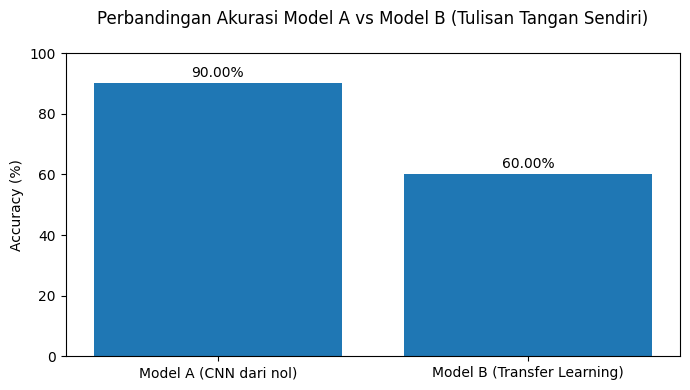

In [192]:
plt.figure(figsize=(7,4))  # Grafik batang
models = df_summary['Model']  # Nama model
accs = df_summary['Accuracy (%)'].astype(float)  # Akurasi
bars = plt.bar(models, accs)  # Buat batang
plt.ylim(0, 100)  # Batas 0-100%
plt.ylabel('Accuracy (%)')  # Label Y
plt.title('Perbandingan Akurasi Model A vs Model B (Tulisan Tangan Sendiri)\n')  # Judul

# beri label angka di atas bar
for bar in bars:  # Tambah angka di atas batang
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1, f'{h:.2f}%', ha='center', va='bottom')
plt.tight_layout()  # Rapihin
plt.savefig('comparison_plot.png', dpi=150)  # Simpan gambar
plt.show()  # Tampilkan

# Confusion Matrix

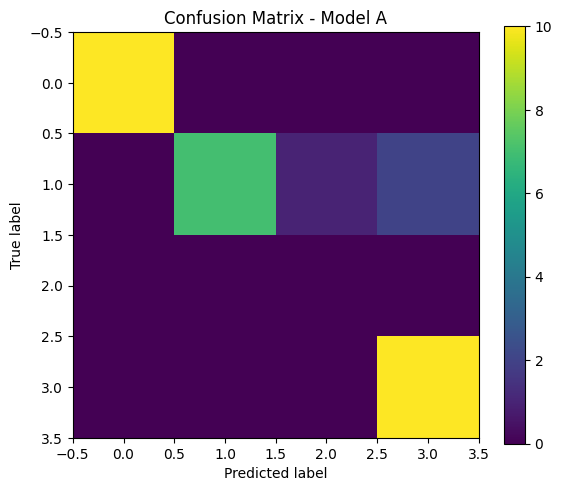

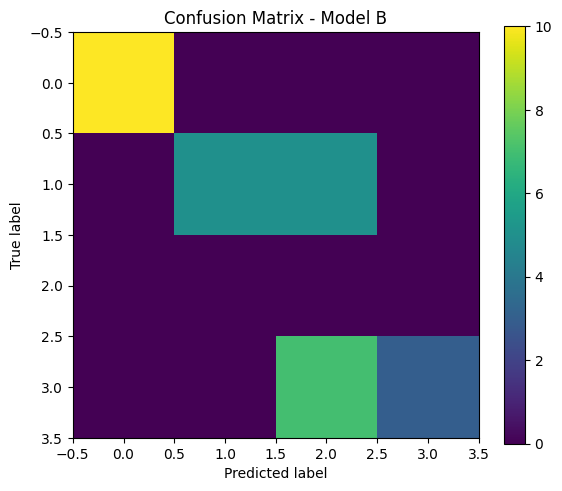

In [193]:
# Model A
if SKLEARN_AVAILABLE and have_details_a:  # Kalau bisa
    cm_a = confusion_matrix(y_true_a, y_pred_a)  # Hitung confusion matrix
    plt.figure(figsize=(6,5))  # Grafik
    plt.imshow(cm_a, interpolation='nearest')  # Tampilkan
    plt.title('Confusion Matrix - Model A')  # Judul
    plt.colorbar()  # Warna
    plt.xlabel('Predicted label')  # X
    plt.ylabel('True label')  # Y
    plt.tight_layout()  # Rapi
    plt.show()  # Tampilkan

# Model B
if SKLEARN_AVAILABLE and have_details_b:  # Sama untuk Model B
    cm_b = confusion_matrix(y_true_b, y_pred_b)
    plt.figure(figsize=(6,5))
    plt.imshow(cm_b, interpolation='nearest')
    plt.title('Confusion Matrix - Model B')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()